Imports pandas library for dataframes, requests library to send HTTP requests, matplotlib library for graph visualization, and BeautifulSoup library to pull data. 

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

Requests to get the contents of the Wikipedia page of Len Wickwar using get function in Requests

In [3]:
url = "https://en.wikipedia.org/wiki/Len_Wickwar"
response = requests.get(url)

Pulls the data from what response requested and stores it into variable soup

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

Finds all instances of a wikitable in the url

In [5]:
wickwar_table=soup.find_all('table',{'class':"wikitable"})

Gets the second wikitable that contains a list of fights

In [6]:
fight_record = pd.read_html(str(wickwar_table[1]))

Puts the content into a dataframe fight_record

In [7]:
fight_record = pd.DataFrame(fight_record[0])

Saves a copy of the raw data to wickwar_raw_data.csv

In [8]:
fight_record.to_csv("wickwar_raw_data.csv")

Displays the first five rows of fight_record

In [9]:
(fight_record.head())

,No.,Result,Record,Opponent,Type,Round,Date,Location,Notes
0,473,Loss,342–86–43 (2),Danny Cunningham,KO,5 (8),"Feb 6, 1947","New St James Hall, Newcastle, Tyne and Wear, E...",NaN
1,472,Win,342–85–43 (2),Stan Hibbert,PTS,8,"Dec 9, 1946","Granby Halls, Leicester, Leicestershire, England",NaN
2,471,Win,341–85–43 (2),Ralph Moss,PTS,8,"Dec 2, 1946","Granby Halls, Leicester, Leicestershire, England",NaN
3,470,Win,340–85–43 (2),Mick Gibbons,RTD,5 (10),"Nov 11, 1946","Cossington Street Baths, Leicester, Leicesters...",NaN
4,469,Win,339–85–43 (2),Ginger Ward,PTS,10,"Jun 10, 1940","Skating Rink, Nuneaton, Warwickshire, England",NaN


Drop Notes, Round, and Location columns as it is not necessary

In [10]:
fight_record = fight_record.drop(columns = ['Notes', 'Round', 'Location', 'Record'])
fight_record

,No.,Result,Opponent,Type,Date
0,473,Loss,Danny Cunningham,KO,"Feb 6, 1947"
1,472,Win,Stan Hibbert,PTS,"Dec 9, 1946"
2,471,Win,Ralph Moss,PTS,"Dec 2, 1946"
3,470,Win,Mick Gibbons,RTD,"Nov 11, 1946"
4,469,Win,Ginger Ward,PTS,"Jun 10, 1940"
...,...,...,...,...,...
468,5,Win,Harry Siddons,PTS,"Dec 7, 1928"
469,4,Win,Bobby Wood,PTS,"Nov 26, 1928"
470,3,Loss,Norman Snow,PTS,"Nov 19, 1928"
471,2,Win,Tommy Cann,PTS,"Nov 13, 1928"


Creates a list that contain the year that the fight happened, goes through data frame and split the data to get the year

In [11]:
year = []

for i in range(len(fight_record)):
    split_date = (fight_record['Date'].iloc[i].split(", "))
    year.append(split_date[1])

Creates a new column in fight_record called Year with values of list year

In [12]:
fight_record['Year'] = year

Drop the date column from fight_record

In [13]:
fight_record = fight_record.drop(columns = 'Date')

Sort the fights in chronological order

In [14]:
fight_record = fight_record.sort_values(by=['No.'])
fight_record

,No.,Result,Opponent,Type,Year
472,1,Win,Jim Young Shepherdson,KO,1928
471,2,Win,Tommy Cann,PTS,1928
470,3,Loss,Norman Snow,PTS,1928
469,4,Win,Bobby Wood,PTS,1928
468,5,Win,Harry Siddons,PTS,1928
...,...,...,...,...,...
4,469,Win,Ginger Ward,PTS,1940
3,470,Win,Mick Gibbons,RTD,1946
2,471,Win,Ralph Moss,PTS,1946
1,472,Win,Stan Hibbert,PTS,1946


One-hot encodes the Result column in fight_record, saves to new dataframe fight_df

In [15]:
fight_df = pd.get_dummies(fight_record,columns=['Result'])
fight_df

,No.,Opponent,Type,Year,Result_Draw,Result_Loss,Result_NC,Result_Win
472,1,Jim Young Shepherdson,KO,1928,0,0,0,1
471,2,Tommy Cann,PTS,1928,0,0,0,1
470,3,Norman Snow,PTS,1928,0,1,0,0
469,4,Bobby Wood,PTS,1928,0,0,0,1
468,5,Harry Siddons,PTS,1928,0,0,0,1
...,...,...,...,...,...,...,...,...
4,469,Ginger Ward,PTS,1940,0,0,0,1
3,470,Mick Gibbons,RTD,1946,0,0,0,1
2,471,Ralph Moss,PTS,1946,0,0,0,1
1,472,Stan Hibbert,PTS,1946,0,0,0,1


Gets the fighter names from the Series most_fights

In [16]:
fighters_names = fight_df.Opponent.value_counts().index.tolist()

Gets a series of fighters who have fought Wickwar the most

In [17]:
most_fights = fight_df.Opponent.value_counts()
last_top = 0

Finds the last index that has more than 5 fights

In [18]:
for numb in range(len(most_fights)):
    if most_fights[numb] > 5:
        last_top = numb
top_fighters = []
last_top += 1

Gets the fighter names that fought Wickwar more than 5 times

In [19]:
for i in range(last_top):
    top_fighters.append(fighters_names[i])
most_fights = most_fights.head(last_top)

Plots the opponents and how many times they fought Wickwar


Text(0, 0.5, 'Times fighting Wickwar')

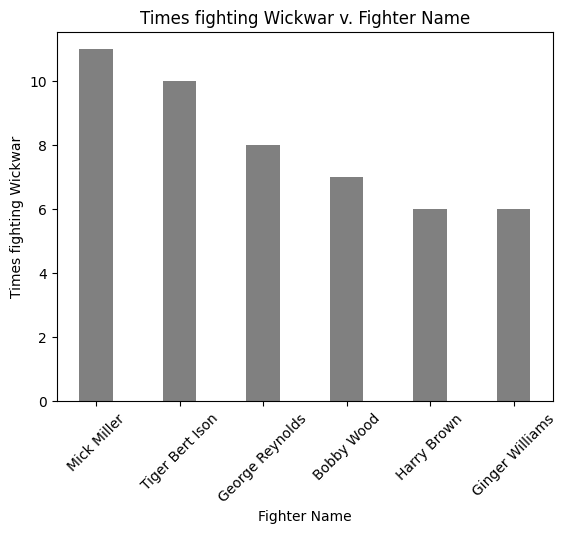

In [26]:
plt.bar(top_fighters, most_fights, width = 0.4, color = 'gray')
plt.xticks(rotation=45)
plt.title("Times fighting Wickwar v. Fighter Name")
plt.xlabel("Fighter Name")
plt.ylabel("Times fighting Wickwar")


Gets the unique values of years that Wickwar fought into list years and create counter for fights, list with wins per year, and a win counter

In [21]:
years = fight_df.Year.unique()

fight_count = 0
wins_by_year = []
wins_count = 0

Goes through all of the years, and through all the elements of fight_df, increases fight_count if year matches, increases win count by value of Result_Win, and adds percentage of fights won to the wins_by_year lists


In [22]:
for year_i in range(len(years)):
    for i in range(len(fight_df)):
        if fight_df['Year'].iloc[i] == years[year_i]:
            fight_count += 1
            
            wins_count += fight_df['Result_Win'].iloc[i]
    wins_by_year.append(100 * wins_count / fight_count)  
    
    wins_count = 0
    fight_count = 0

Plots years as the x-axis and wins_by_year as the y-axis

Text(0.5, 1.0, "Len Wickwar's Boxing Win Percentage By Year")

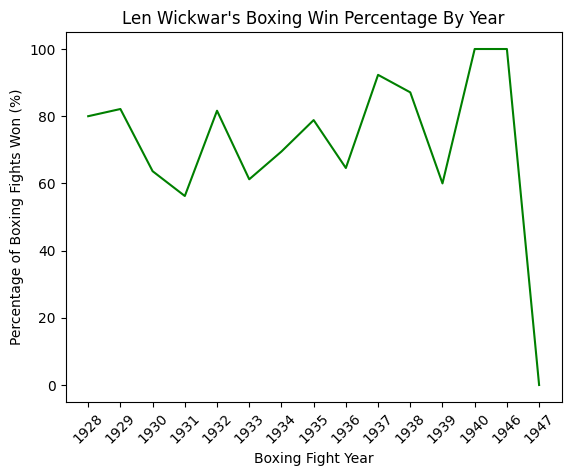

In [23]:
plt.plot(years, wins_by_year, color = 'green')
plt.xticks(rotation=45)
plt.xlabel('Boxing Fight Year')
plt.ylabel('Percentage of Boxing Fights Won (%)')
plt.title("Len Wickwar's Boxing Win Percentage By Year")

Gets only the elements that are losses in fight_df

In [24]:
loss_df = fight_df.copy(deep = True)
loss_df = loss_df[loss_df['Result_Loss'] == 1]
loss_df

,No.,Opponent,Type,Year,Result_Draw,Result_Loss,Result_NC,Result_Win
470,3,Norman Snow,PTS,1928,0,1,0,0
452,21,Jack Bradshaw,PTS,1929,0,1,0,0
443,30,Frankie Brown,KO,1929,0,1,0,0
437,36,Eric Jones,KO,1930,0,1,0,0
423,50,Tommy Upton,KO,1930,0,1,0,0
...,...,...,...,...,...,...,...,...
15,458,Jimmy Vaughan,PTS,1939,0,1,0,0
13,460,Les McCarthy,PTS,1939,0,1,0,0
9,464,Eric Boon,KO,1939,0,1,0,0
8,465,Benny Caplan,PTS,1939,0,1,0,0


Plots frequency vs. Len lost his boxing matches

Text(0.5, 1.0, 'Frequency v. Method Len was defeated')

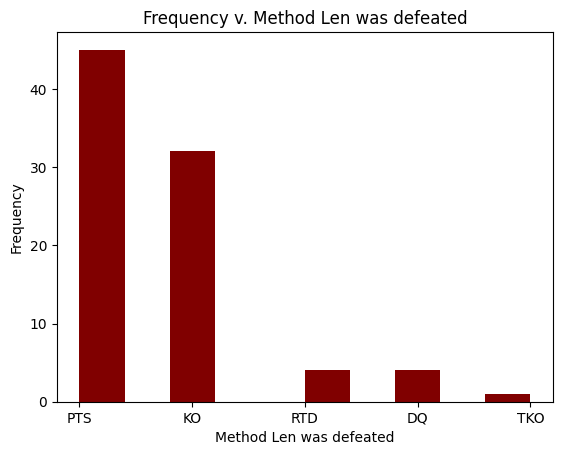

In [25]:
plt.hist(loss_df['Type'], color = 'maroon')
plt.xlabel("Method Len was defeated")
plt.ylabel("Frequency")
plt.title("Frequency v. Method Len was defeated")

Puts the processed data into a csv file 

In [28]:
fight_df.to_csv("wickwar_processed_data.csv")